In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")

In [3]:
data = pd.read_excel('project_data.xlsx')

In [4]:
data.head(5)

,id,contest,organization,OGRN,INN,region,project,category,requested_amount,total_amount,start_date,end_date,ok_grant_date,status,grant_amount,results
0,17-1-000390,Первый конкурс 2017 г.,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ЦЕНТР ПС...,1141400001236,1435973367,Республика Саха (Якутия),Истоки жизни,"охрана здоровья граждан, пропаганда здорового ...",499810.00,516172.50,2017-09-01,2018-11-30 00:00:00,2017-07-31,победитель конкурса,499810.00,проект реализован удовлетворительно
1,17-1-000474,Первый конкурс 2017 г.,РЕГИОНАЛЬНАЯ ОБЩЕСТВЕННАЯ ОРГАНИЗАЦИЯ ИНВАЛИДО...,1037700076754,7709215200,Москва,Все включены: развитие инклюзивного общества,"социальное обслуживание, социальная поддержка ...",12546289.26,20431838.57,2017-09-01,2018-11-30 00:00:00,2017-07-31,победитель конкурса,12546289.26,проект реализован успешно
2,17-1-000500,Первый конкурс 2017 г.,ВОЛГОГРАДСКИЙ ОБЛАСТНОЙ ОБЩЕСТВЕННЫЙ БЛАГОТВОР...,1023400014582,3435210016,Волгоградская область,Территория равных возможностей,"социальное обслуживание, социальная поддержка ...",2108676.00,5570400.00,2017-09-01,2018-11-30 00:00:00,2017-07-31,победитель конкурса,2108676.00,проект реализован успешно
3,17-1-000589,Первый конкурс 2017 г.,"ОБЩЕСТВЕННАЯ ОРГАНИЗАЦИЯ ""ФЕДЕРАЛЬНАЯ НАЦИОНАЛ...",1027746001931,7710335357,Москва,Информационно-коммуникационные технологии в де...,развитие институтов гражданского общества,5233932.00,7715932.00,2017-09-01,2018-08-31 00:00:00,NaT,проект не получил поддержки,NaN,NaN
4,17-1-000782,Первый конкурс 2017 г.,МЕЖРЕГИОНАЛЬНОЕ МОЛОДЕЖНОЕ ОБЩЕСТВЕННОЕ ДВИЖЕН...,1097799022188,7726367629,Москва,Региональный Центр развития и поддержки социал...,развитие институтов гражданского общества,2960275.00,5687025.00,2017-10-01,2018-10-31 00:00:00,2017-07-31,победитель конкурса,2960275.00,проект реализован успешно


# Часть 1. EDA

## 1. Заполним пропуски данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103440 entries, 0 to 103439
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                103440 non-null  object        
 1   contest           103440 non-null  object        
 2   organization      103440 non-null  object        
 3   OGRN              103440 non-null  int64         
 4   INN               103440 non-null  int64         
 5   region            103440 non-null  object        
 6   project           103437 non-null  object        
 7   category          103440 non-null  object        
 8   requested_amount  103440 non-null  float64       
 9   total_amount      103440 non-null  float64       
 10  start_date        103439 non-null  datetime64[ns]
 11  end_date          103439 non-null  object        
 12  ok_grant_date     21963 non-null   datetime64[ns]
 13  status            103440 non-null  object        
 14  gran

Удалим ненужные столбцы - id, organization, project, INN. Поля OGRN и contest пока оставим, чтобы посчитать по ним дополнительные признаки

In [6]:
data.drop(['id', 'organization', 'project', 'INN', 'ok_grant_date'], inplace=True, axis=1)

In [7]:
data[data['start_date'].isna() == True]

,contest,OGRN,region,category,requested_amount,total_amount,start_date,end_date,status,grant_amount,results
102126,Первый конкурс 2022 г.,1161400050393,Республика Саха (Якутия),Охрана окружающей среды и защита животных,786510.0,1136510.0,NaT,NaN,проект не получил поддержки,NaN,NaN


In [8]:
data[data['end_date'].isna() == True]

,contest,OGRN,region,category,requested_amount,total_amount,start_date,end_date,status,grant_amount,results
102126,Первый конкурс 2022 г.,1161400050393,Республика Саха (Якутия),Охрана окружающей среды и защита животных,786510.0,1136510.0,NaT,NaN,проект не получил поддержки,NaN,NaN


Одну строку не жалко: выпилим ее

In [9]:
data = data[data['start_date'].notna()]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103439 entries, 0 to 103439
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   contest           103439 non-null  object        
 1   OGRN              103439 non-null  int64         
 2   region            103439 non-null  object        
 3   category          103439 non-null  object        
 4   requested_amount  103439 non-null  float64       
 5   total_amount      103439 non-null  float64       
 6   start_date        103439 non-null  datetime64[ns]
 7   end_date          103439 non-null  object        
 8   status            103439 non-null  object        
 9   grant_amount      21963 non-null   float64       
 10  results           11131 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 9.5+ MB


In [11]:
data['status'].value_counts()

проект не получил поддержки    79683
победитель конкурса            21963
отозван заявителем              1793
Name: status, dtype: int64

Удалим отозванные заявителями проекты

In [12]:
data = data[data['status'] != 'отозван заявителем']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101646 entries, 0 to 103439
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   contest           101646 non-null  object        
 1   OGRN              101646 non-null  int64         
 2   region            101646 non-null  object        
 3   category          101646 non-null  object        
 4   requested_amount  101646 non-null  float64       
 5   total_amount      101646 non-null  float64       
 6   start_date        101646 non-null  datetime64[ns]
 7   end_date          101646 non-null  object        
 8   status            101646 non-null  object        
 9   grant_amount      21963 non-null   float64       
 10  results           11131 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 9.3+ MB


Заполним пропуски в сумме гранта 0 (т.е. грант не получен)

In [14]:
data['grant_amount'] = data['grant_amount'].fillna(0)

Заполним пропуски в статусе реализации проекта на "нет данных"

In [15]:
data['results'] = data['results'].fillna("нет данных")

In [16]:
data['results'].value_counts(normalize=True)

нет данных                                                                                  0.890492
проект реализован успешно                                                                   0.083673
проект реализован удовлетворительно                                                         0.018810
проект реализован неудовлетворительно                                                       0.003168
проект реализован успешно и признан одним из 100 лучших реализованных проектов 2017 года    0.000984
проект реализован успешно и признан одним из 100 лучших реализованных проектов 2018 года    0.000984
проект реализован успешно и признан одним из 100 лучших реализованных проектов 2019 года    0.000984
проект, к реализации которого победитель конкурса не приступал (грант не использовался)     0.000905
Name: results, dtype: float64

Видим, что в поле project_results очень много пропусков, поэтому удалим его тоже

In [17]:
data.drop(['results'], inplace=True, axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101646 entries, 0 to 103439
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   contest           101646 non-null  object        
 1   OGRN              101646 non-null  int64         
 2   region            101646 non-null  object        
 3   category          101646 non-null  object        
 4   requested_amount  101646 non-null  float64       
 5   total_amount      101646 non-null  float64       
 6   start_date        101646 non-null  datetime64[ns]
 7   end_date          101646 non-null  object        
 8   status            101646 non-null  object        
 9   grant_amount      101646 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 8.5+ MB


## 2. Добавим новые поля

Для начала переведем даты в один тип данных 

In [19]:
data['end_date']

0         2018-11-30 00:00:00
1         2018-11-30 00:00:00
2         2018-11-30 00:00:00
3         2018-08-31 00:00:00
4         2018-10-31 00:00:00
                 ...         
103433    2022-07-31 00:00:00
103434    2022-06-01 00:00:00
103435    2022-12-31 00:00:00
103438    2022-07-31 00:00:00
103439    2022-12-15 00:00:00
Name: end_date, Length: 101646, dtype: object

In [20]:
data['end_date'] = pd.to_datetime(data['end_date'], infer_datetime_format=True, errors = 'coerce')  

Вычислим продолжительность проекта. Для этого найдем timedelta

In [21]:
data['duration'] = (data['end_date'] - data['start_date']).dt.days

На "рейтинг доверия" организации или качество заполнения заявки может влиять участие в конкурсе ранее. <br> 
Поэтому рассчитаем общее количество заявок на грант до текущей, и сколько из них было одобрено. <br>
Однако, даты подачи заявки в датасете нет. Будем считать количество заявок по последним датам приема документов, указанных на сайте <br>
https://xn--80afcdbalict6afooklqi5o.xn--p1ai/public/contest/index. То есть, 15 октября и 15 марта каждого года, а для специального конкурса 15 июля - 
2020 года. 

In [22]:
data['contest'].unique()

array(['Первый конкурс 2017 г.', 'Второй конкурс 2017 г.',
       'Первый конкурс 2018 г.', 'Второй конкурс 2018 г.',
       'Первый конкурс 2019 г.', 'Второй конкурс 2019 г.',
       'Первый конкурс 2020 г.', 'Второй конкурс 2020 г.',
       'Специальный конкурс 2020 г.', 'Первый конкурс 2021 г.',
       'Второй конкурс 2021 г.', 'Первый конкурс 2022 г.'], dtype=object)

In [23]:
date_dict = {'Первый конкурс 2017 г.': '2016-10-15', 
           'Второй конкурс 2017 г.': '2017-03-15',
           'Первый конкурс 2018 г.': '2017-10-15', 
           'Второй конкурс 2018 г.': '2018-03-15',
           'Первый конкурс 2019 г.': '2018-10-15',
           'Второй конкурс 2019 г.': '2019-03-15',
           'Первый конкурс 2020 г.': '2019-10-15', 
           'Второй конкурс 2020 г.': '2020-03-15',
           'Специальный конкурс 2020 г.': '2020-07-15', 
           'Первый конкурс 2021 г.': '2020-10-15',
           'Второй конкурс 2021 г.': '2021-03-15', 
           'Первый конкурс 2022 г.': '2021-10-15'}

In [24]:
project_number = []
for contest, ogrn in zip(data['contest'],data['OGRN']):
    mask = data[data['OGRN'] == ogrn]['start_date'] < date_dict[contest]
    project_number.append(len(mask[mask == True]))
    
data['project_number'] = project_number

In [25]:
win_project_number = []
for contest, ogrn in zip(data['contest'],data['OGRN']):
    win_project_number.append(len(data[(data['OGRN'] == ogrn) & \
                                          (data['start_date'] < date_dict[contest]) & 
                                          (data['status'] == 'победитель конкурса')]))
    
data['win_project_number'] = win_project_number

Посчитаем долю побед от общего числа заявок

In [26]:
data['win_proportion'] = data['win_project_number'] / data['project_number']

In [27]:
data['win_proportion'] = data['win_proportion'].fillna(0)

In [28]:
# доля запрашиваемой суммы от всей стоимости проекта
data['requested_total_proportion'] = data['requested_amount'] / data['total_amount']
# доля полученного гранта от запрашиваемой суммы
data['grant_requested_proportion'] = data['grant_amount'] / data['requested_amount'] 
data.grant_requested_proportion.fillna(0)
# доля полученного гранта от всей суммы проекта
data['grant_total_propotion'] = data['grant_amount'] / data['total_amount']

Тут можно удалить больше незначимые для нас поля contest, OGRN, start_date, end_date

In [29]:
data.drop(['contest', 'start_date', 'end_date'], inplace=True, axis=1)

In [30]:
# сохраню датасет, чтобы не проходить снова предыдущие этапы
data.to_excel('eda_project_data.xlsx', index=False)

In [31]:
data.head(5)

,OGRN,region,category,requested_amount,total_amount,status,grant_amount,duration,project_number,win_project_number,win_proportion,requested_total_proportion,grant_requested_proportion,grant_total_propotion
0,1141400001236,Республика Саха (Якутия),"охрана здоровья граждан, пропаганда здорового ...",499810.00,516172.50,победитель конкурса,499810.00,455.0,0,0,0.0,0.968300,1.0,0.968300
1,1037700076754,Москва,"социальное обслуживание, социальная поддержка ...",12546289.26,20431838.57,победитель конкурса,12546289.26,455.0,0,0,0.0,0.614056,1.0,0.614056
2,1023400014582,Волгоградская область,"социальное обслуживание, социальная поддержка ...",2108676.00,5570400.00,победитель конкурса,2108676.00,455.0,0,0,0.0,0.378550,1.0,0.378550
3,1027746001931,Москва,развитие институтов гражданского общества,5233932.00,7715932.00,проект не получил поддержки,0.00,364.0,0,0,0.0,0.678328,0.0,0.000000
4,1097799022188,Москва,развитие институтов гражданского общества,2960275.00,5687025.00,победитель конкурса,2960275.00,395.0,0,0,0.0,0.520531,1.0,0.520531


## 3. Построим визуализации

Рассмотрим распределение целевой переменной project_status

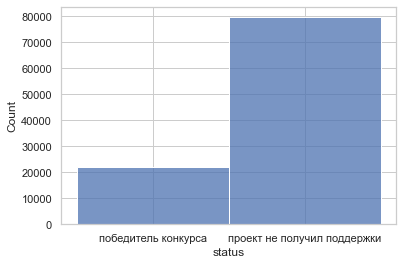

In [32]:
sns.histplot(data, x="status");

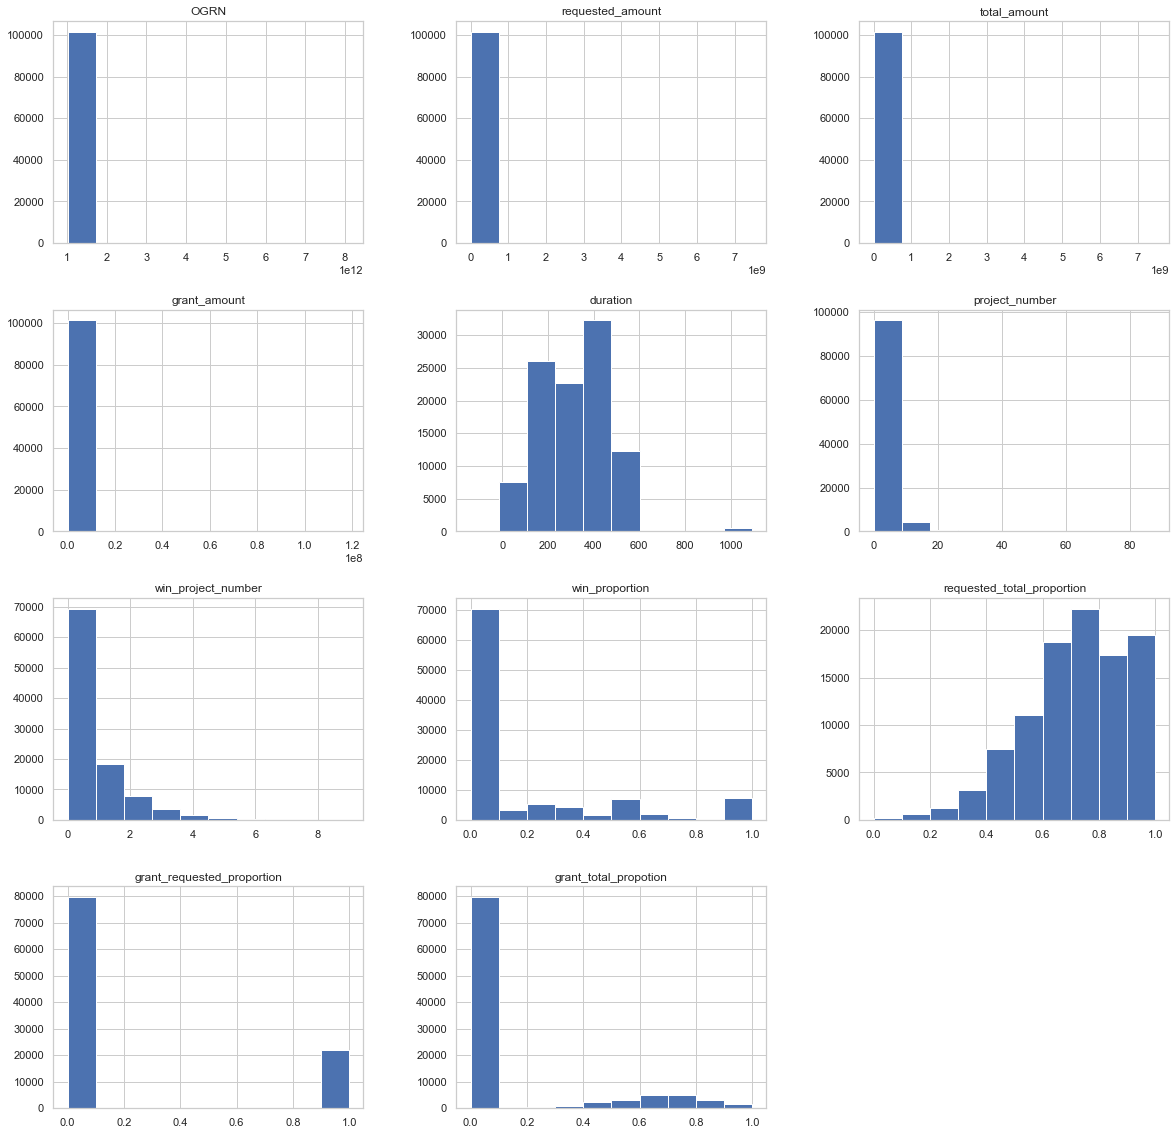

In [33]:
data.hist(figsize = (20, 20));

In [34]:
data.status.value_counts()

проект не получил поддержки    79683
победитель конкурса            21963
Name: status, dtype: int64

In [35]:
data.status.value_counts(normalize=True)

проект не получил поддержки    0.783927
победитель конкурса            0.216073
Name: status, dtype: float64

In [36]:
# columns = list(data.columns)
# columns.remove('status')
# len(columns)

# fig, axes = plt.subplots(nrows = 6, ncols = 5, figsize = (18, 15))

# for idx, feat in enumerate(columns):
#     axes[idx // 5, idx % 5].hist(data[data['status'] == 'проект не получил поддержки'][feat], color='#7CC290', alpha=0.7)
#     axes[idx // 5, idx % 5].hist(data[data['status'] == 'победитель конкурса'][feat], color='#8FF782', alpha=0.7)
#     axes[idx // 5, idx % 5].set_xlabel(feat)
#     plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [37]:
data.corr()

,OGRN,requested_amount,total_amount,grant_amount,duration,project_number,win_project_number,win_proportion,requested_total_proportion,grant_requested_proportion,grant_total_propotion
OGRN,1.000000,-0.002825,-0.003485,-0.037510,-0.087930,-0.030242,-0.042890,-0.022412,-0.043959,-0.003910,-0.011101
requested_amount,-0.002825,1.000000,0.904590,0.049977,0.051066,-0.002578,0.008758,0.007839,0.016905,-0.011327,-0.011342
total_amount,-0.003485,0.904590,1.000000,0.086649,0.054865,0.001119,0.018012,0.016549,-0.029151,-0.005459,-0.011942
grant_amount,-0.037510,0.049977,0.086649,1.000000,0.088690,0.019605,0.160699,0.170889,-0.088297,0.444945,0.420340
duration,-0.087930,0.051066,0.054865,0.088690,1.000000,0.046613,0.113748,0.110099,-0.018614,-0.013326,-0.013552
project_number,-0.030242,-0.002578,0.001119,0.019605,0.046613,1.000000,0.562683,0.164734,-0.101445,-0.024502,-0.031127
win_project_number,-0.042890,0.008758,0.018012,0.160699,0.113748,0.562683,1.000000,0.678709,-0.148460,0.131976,0.117834
win_proportion,-0.022412,0.007839,0.016549,0.170889,0.110099,0.164734,0.678709,1.000000,-0.124063,0.175351,0.164985
requested_total_proportion,-0.043959,0.016905,-0.029151,-0.088297,-0.018614,-0.101445,-0.148460,-0.124063,1.000000,-0.174285,-0.045787
grant_requested_proportion,-0.003910,-0.011327,-0.005459,0.444945,-0.013326,-0.024502,0.131976,0.175351,-0.174285,1.000000,0.960159


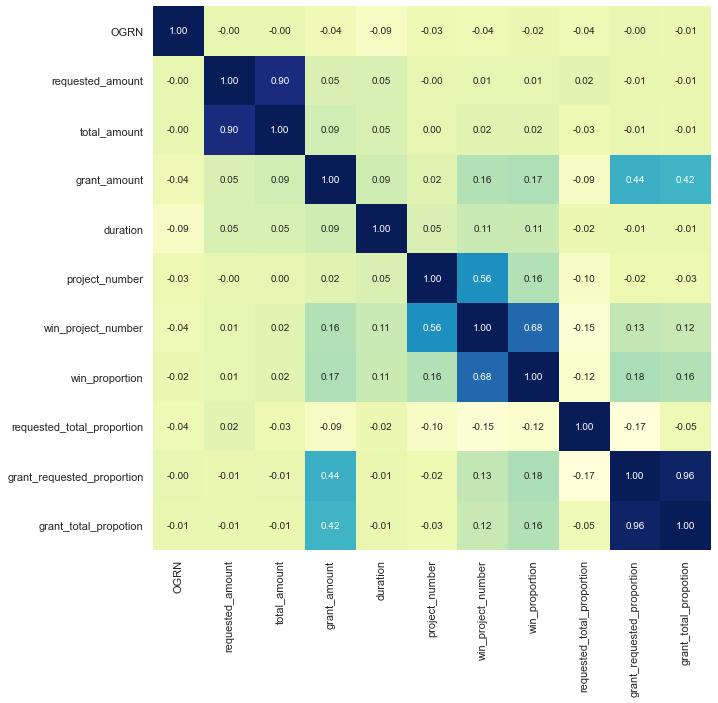

In [38]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, cbar=False, fmt= '.2f')
plt.show()

Распределение количества грантов по регионам

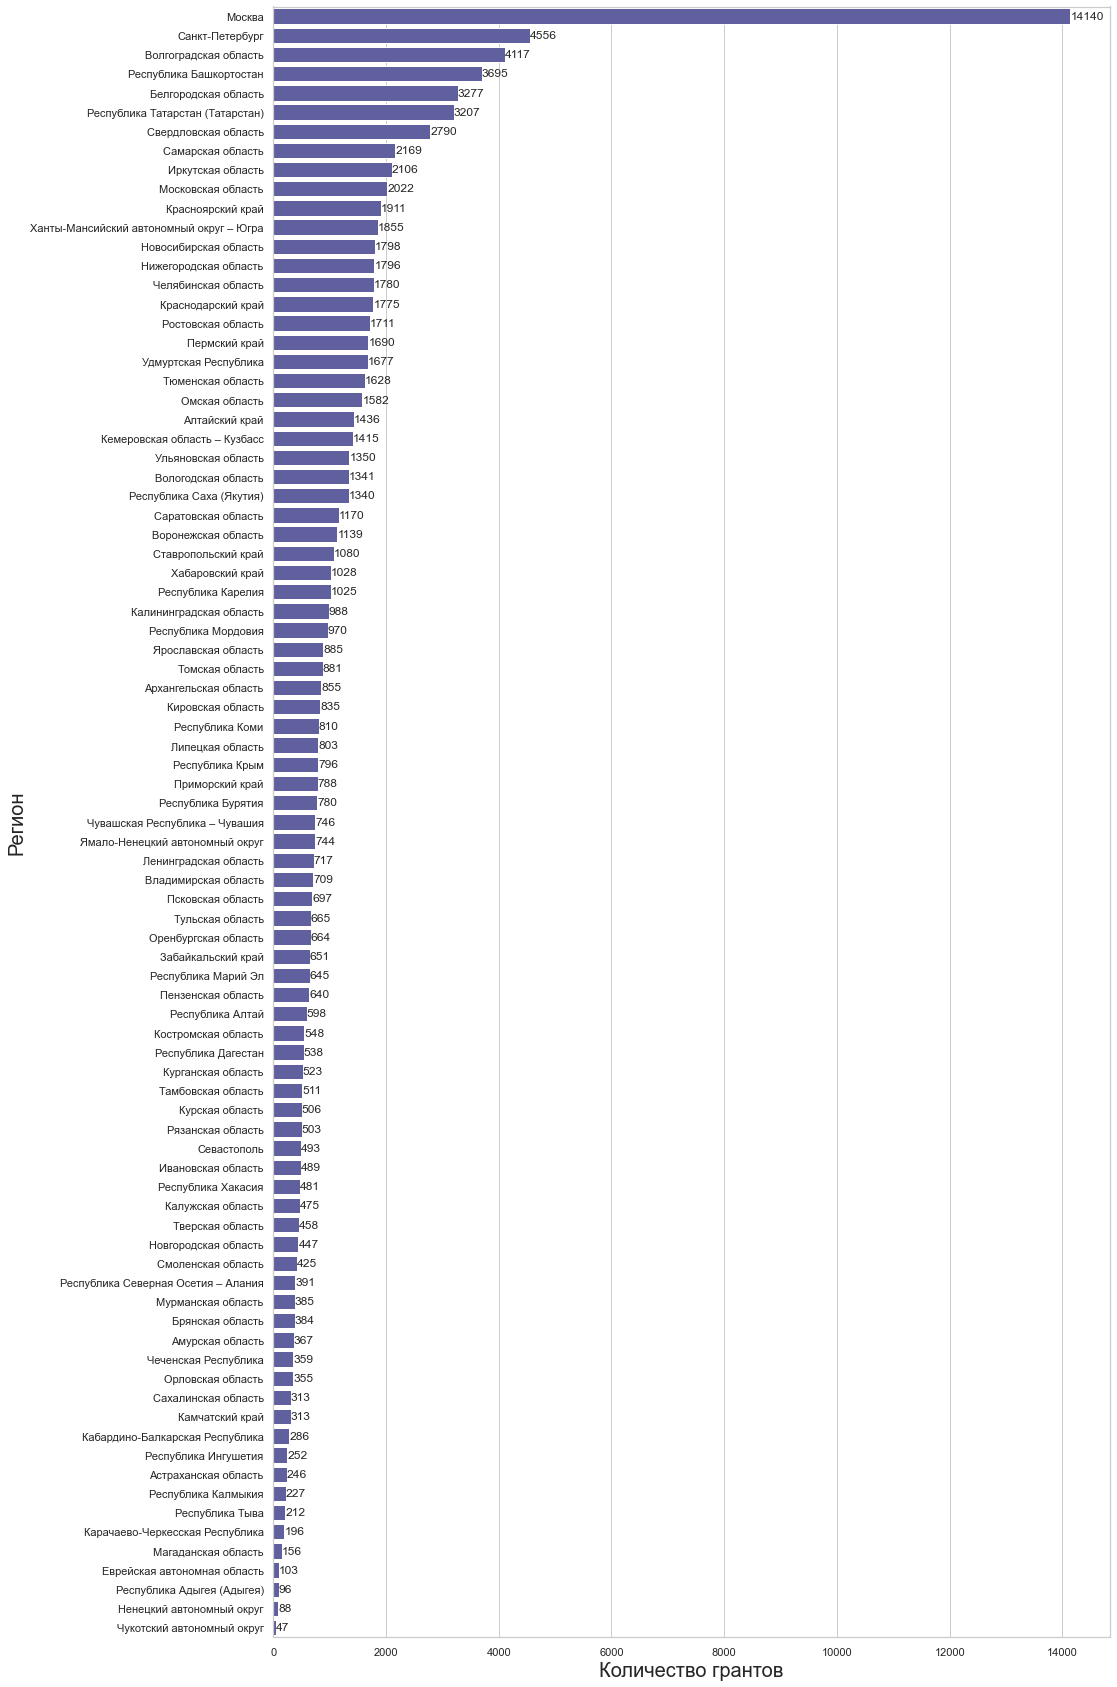

In [39]:
plt.figure(figsize=(15,30))
ax = sns.barplot(x=data.region.value_counts(), y=data.region.value_counts().index, color='blue',
           saturation=.25)
plt.ylabel("Регион", size=20)
plt.xlabel("Количество грантов", size=20)
ax.bar_label(ax.containers[0], size=12)
plt.show()

In [40]:
# разобьем по квантилям, предварительно убрав проекты, не получившие гранты
grant_bins=data[data['grant_amount'] > 0.0].grant_amount.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
grant_bins

0.0    1.946000e+04
0.1    4.258058e+05
0.2    4.920341e+05
0.3    4.991068e+05
0.4    6.130991e+05
0.5    1.120717e+06
0.6    1.688646e+06
0.7    2.359770e+06
0.8    2.954955e+06
0.9    3.976297e+06
1.0    1.187340e+08
Name: grant_amount, dtype: float64

In [41]:
data['grant_groups'] = pd.cut(data['grant_amount'], grant_bins, \
                             labels=['0-0.1', '0.1-0.2', '0.2-0.3','0.3-0.4','0.4-0.5',\
                                     '0.5-0.6', '0.6-0.7', '0.7-0.8',\
                                     '0.8-0.9', '0.9-1'], right=True, include_lowest=True)

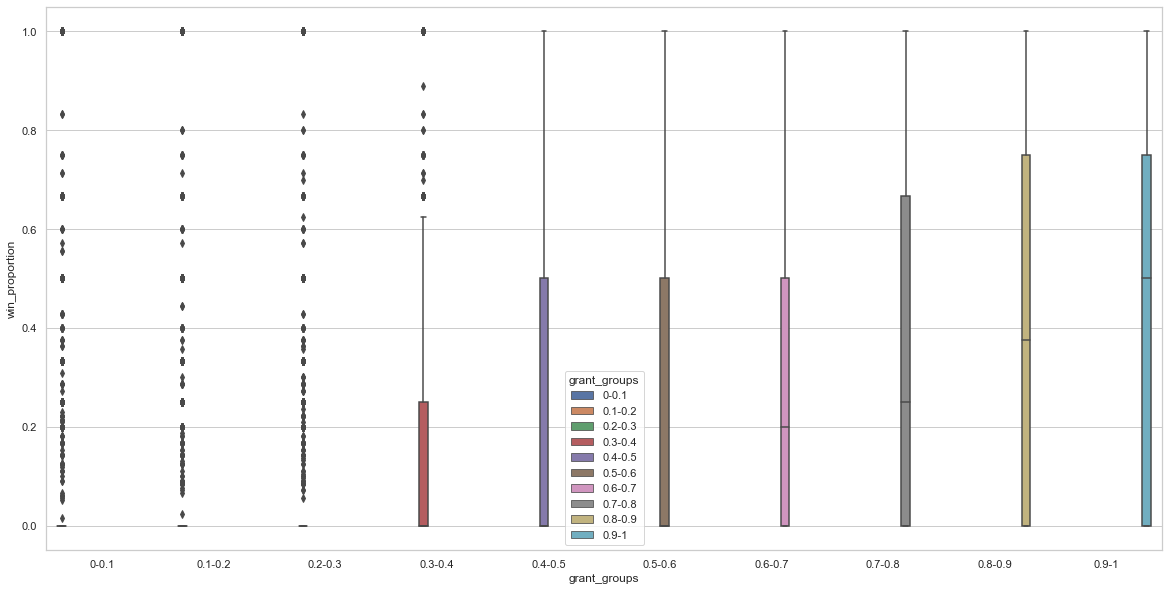

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, y='win_proportion', x='grant_groups', hue='grant_groups')
plt.show()

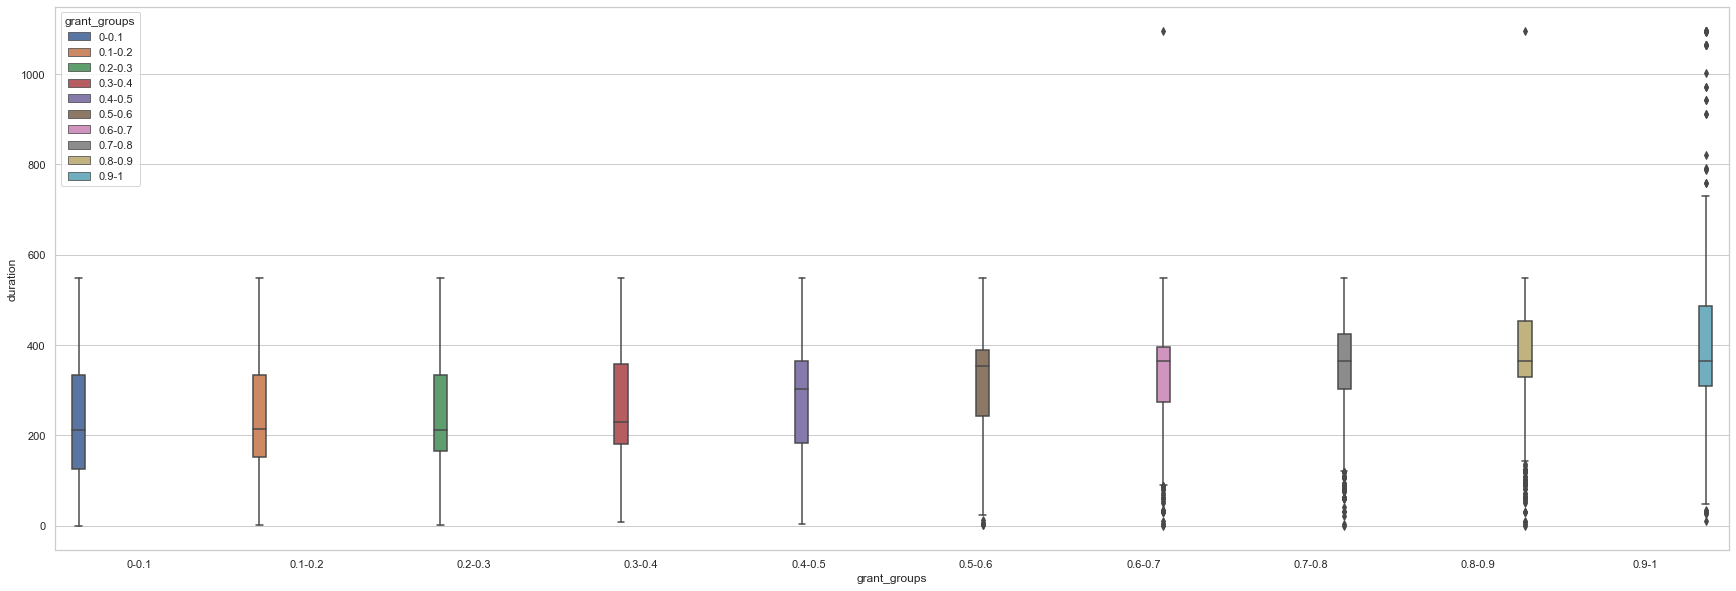

In [43]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data, y='duration', x='grant_groups', hue='grant_groups')
plt.show()

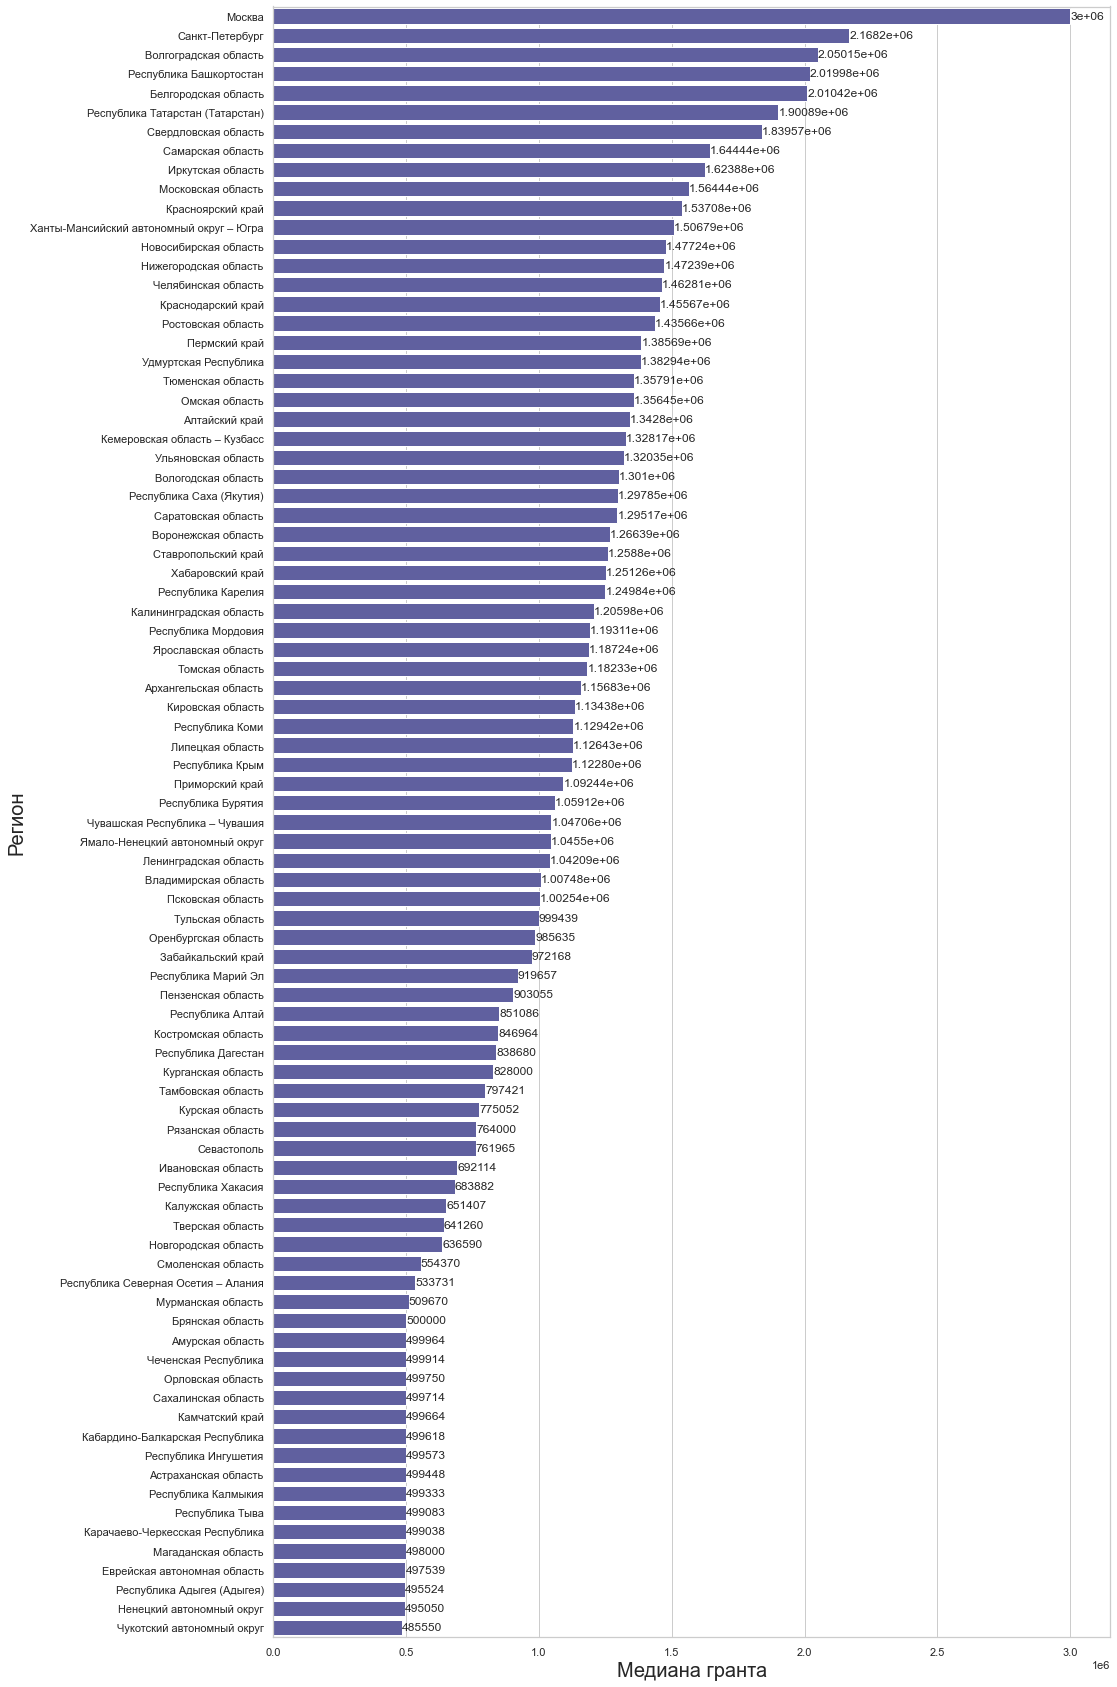

In [44]:
plt.figure(figsize=(15,30))
ax = sns.barplot(x=data[data['grant_amount'] > 0.0].groupby('region')['grant_amount'].median().sort_values(ascending=False), 
            y=data.region.value_counts().index, color='blue',
           saturation=.25)
plt.ylabel("Регион", size=20)
plt.xlabel("Медиана гранта", size=20)
ax.bar_label(ax.containers[0], size=12)
plt.show()

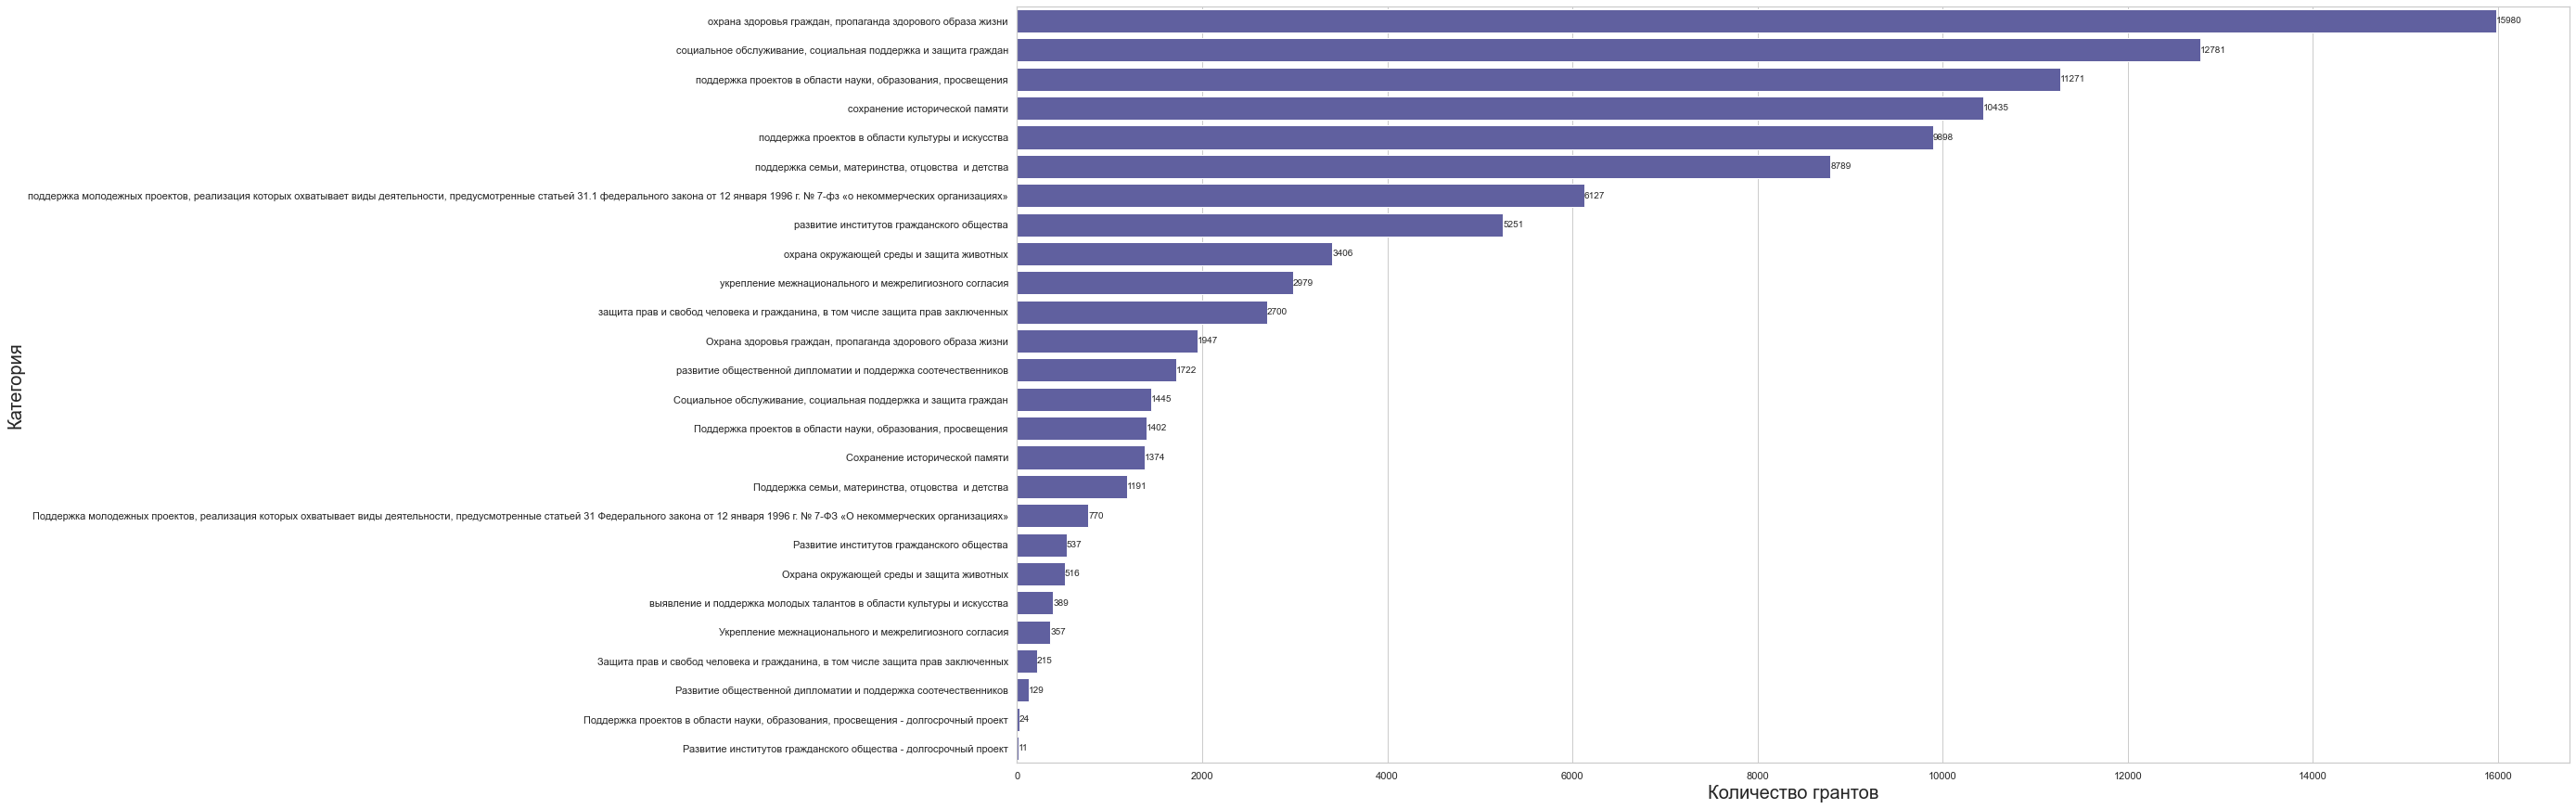

In [45]:
plt.figure(figsize=(30,15))
ax = sns.barplot(x=data.category.value_counts(), 
            y=data['category'].value_counts().index, color='blue',
           saturation=.25)
plt.ylabel("Категория", size=20, )
plt.xlabel("Количество грантов", size=20)
ax.bar_label(ax.containers[0])
plt.show()

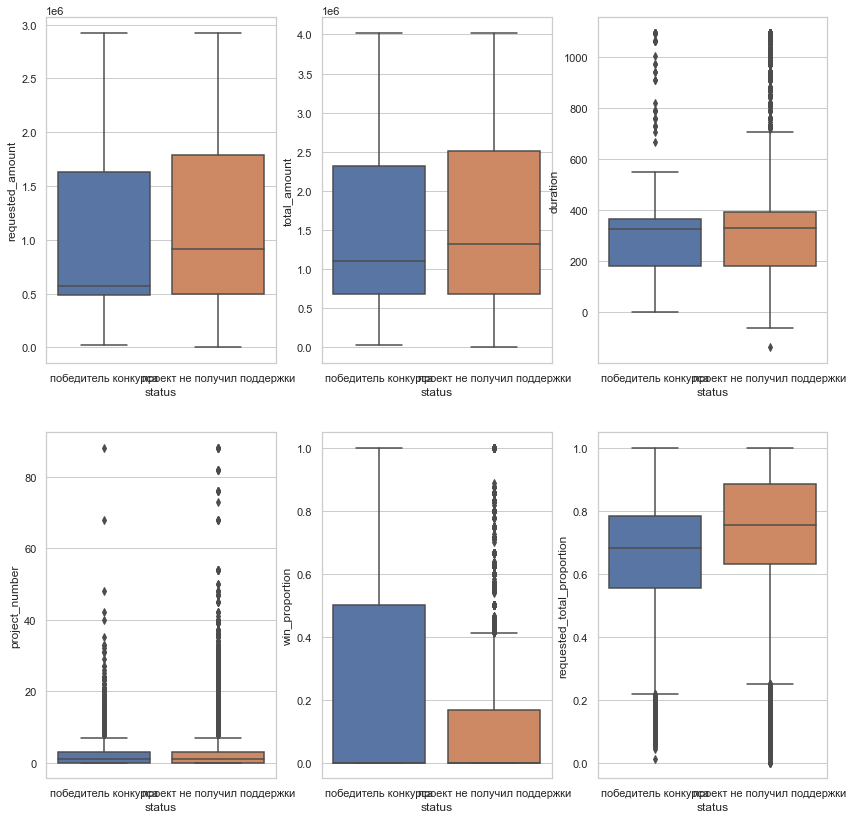

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(14, 14))

Q1 = data['requested_amount'].quantile(0.75)
sns.boxplot(ax=axes[0, 0], data=data[data['requested_amount'] < Q1], x='status', y='requested_amount')

Q2 = data['total_amount'].quantile(0.75)
sns.boxplot(ax=axes[0, 1], data=data[data['total_amount'] < Q2], x='status', y='total_amount')

sns.boxplot(ax=axes[0, 2], data=data, x='status', y='duration')

sns.boxplot(ax=axes[1, 0], data=data, x='status', y='project_number')

sns.boxplot(ax=axes[1, 1], data=data, x='status', y='win_proportion')

sns.boxplot(ax=axes[1, 2], data=data, x='status', y='requested_total_proportion')

plt.show()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101646 entries, 0 to 103439
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   OGRN                        101646 non-null  int64   
 1   region                      101646 non-null  object  
 2   category                    101646 non-null  object  
 3   requested_amount            101646 non-null  float64 
 4   total_amount                101646 non-null  float64 
 5   status                      101646 non-null  object  
 6   grant_amount                101646 non-null  float64 
 7   duration                    101644 non-null  float64 
 8   project_number              101646 non-null  int64   
 9   win_project_number          101646 non-null  int64   
 10  win_proportion              101646 non-null  float64 
 11  requested_total_proportion  101646 non-null  float64 
 12  grant_requested_proportion  101642 non-null  float64 
 13 

## 4. Перекодируем переменные

Перекодируем целевую переменную project_status: победитель конкурса = 1, проект не получил поддержки = 0

In [48]:
data['status'] = data['status'].apply(lambda x: 1 if x == 'победитель конкурса' else 0)

In [49]:
data.drop(['grant_amount', 'grant_requested_proportion', 'grant_total_propotion', 'grant_groups', 'OGRN'], axis=1, inplace=True)

In [50]:
# создаем отдельный датасет для кодировки категориальных фичей
nocat_data = data.copy() 

In [51]:
# используем freq-enc для кодировки региона
nocat_data['region_freq'] = nocat_data['region'].map(data['region'].value_counts()/len(data)).round(decimals=3)
# используем one-hot encoding для кодировки 
one_hot = pd.get_dummies(nocat_data['category'])
nocat_data = nocat_data.join(one_hot)
nocat_data.drop(['region','category'], axis=1, inplace = True)

## 5. Модельки 

In [63]:
### Quality func
def quality_report(prediction, actual):
    print((f" Accuracy: {accuracy_score(prediction, actual):.3f}\n \
Precision: {precision_score(prediction, actual):.3f}\n \
Recall: {recall_score(prediction, actual):.3f}\n \
f1_score: {f1_score(prediction, actual):.3f}"))

In [ ]:
# построим ROC-кривую
def plot_roc_curve(y_test, y_pred): 
    fper, tper, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fper, tper)
    plt.plot(fper, tper, color='green', label=f'ROC-кривая (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC (area = {roc_auc:.3f})')
    plt.legend(loc="lower right")
    plt.show()

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [60]:
# подготовка данных для knn и логистической регрессии
df1 = nocat_data[nocat_data['status'] == 0].head(22000)
# 22k
df2 = nocat_data[nocat_data['status'] ==1]
balanced_data = pd.concat([df1, df2])


X_train, X_test, y_train, y_test = train_test_split(
    balanced_data.drop(['status'], axis=1), balanced_data['status'], test_size=0.30, random_state=42, stratify=balanced_data['status']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### kNN

Train quality:
 Accuracy: 0.808
 Precision: 0.787
 Recall: 0.822
 f1_score: 0.804

Test quality:
 Accuracy: 0.722
 Precision: 0.701
 Recall: 0.732
 f1_score: 0.716


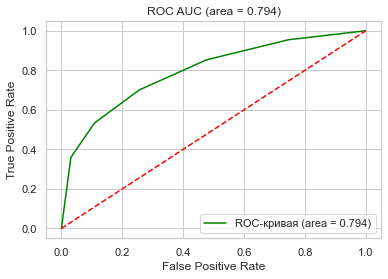

In [66]:
knn = KNeighborsClassifier() #default neighbors = 5 
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict_proba(X_test_scaled)[:,1]


print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

plot_roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])

### Logistic Regression

Train quality:
 Accuracy: 0.743
 Precision: 0.659
 Recall: 0.791
 f1_score: 0.719

Test quality:
 Accuracy: 0.741
 Precision: 0.658
 Recall: 0.789
 f1_score: 0.718


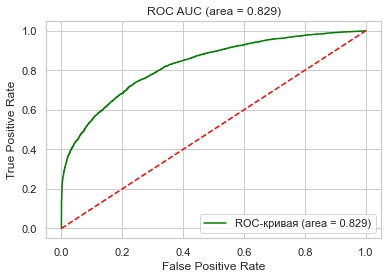

In [69]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=5000,Cs=100, scoring='f1')
log_reg.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

y_pred = log_reg.predict_proba(X_test_scaled)[:,1]
plot_roc_curve(y_test, y_pred)

### Градиентный бустинг

In [70]:
from catboost import CatBoostClassifier

In [71]:
df1 = data[data['status'] == 0].head(22000)
df2 = data[data['status'] ==1]
data = pd.concat([df1, df2])

In [86]:
X = data.drop('status', axis=1)
Y = data['status']
#Train test split
train_X, X_test, train_Y, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(train_X.shape, X_test.shape, train_Y.shape, y_test.shape)


# validation-train split
X_train, X_validation, y_train, y_validation = train_test_split(train_X, train_Y, train_size=0.75, random_state=42)

(35170, 9) (8793, 9) (35170,) (8793,)


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43963 entries, 3 to 103439
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   region                      43963 non-null  object 
 1   category                    43963 non-null  object 
 2   requested_amount            43963 non-null  float64
 3   total_amount                43963 non-null  float64
 4   status                      43963 non-null  int64  
 5   duration                    43963 non-null  float64
 6   project_number              43963 non-null  int64  
 7   win_project_number          43963 non-null  int64  
 8   win_proportion              43963 non-null  float64
 9   requested_total_proportion  43963 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.7+ MB


In [100]:
# {'params': {'depth': 5, 'iterations': 500, 'learning_rate': 0.03}
est = CatBoostClassifier(iterations=500, 
                         cat_features=['region', 'category'],
                         logging_level='Silent',  
                         eval_metric='F1',
                         learning_rate = 0.05,
                         max_depth = 5 
)
est.fit(
    X_train, y_train,
    cat_features=['region', 'category'],
    eval_set=(X_validation, y_validation),
    plot=True
)

quality_report(est.predict(X_test), y_test)
print('ROC-AUC', round(roc_auc_score(y_test, est.predict_proba(X_test)[:,1]),3))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

 Accuracy: 0.779
 Precision: 0.730
 Recall: 0.805
 f1_score: 0.766
ROC-AUC 0.864


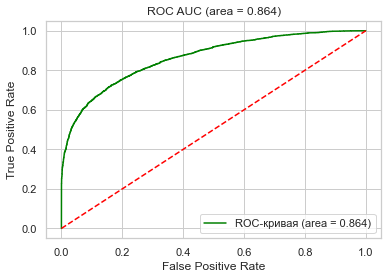

In [101]:
y_pred = est.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_pred)